# Zadanie 3

In [19]:
import numpy as np
import scipy.stats 
import seaborn as sns
import matplotlib.pyplot as plt

Dla każdej z hipotez z zadań 1-2 wyznacz symulacyjnie prawdopodobieństwa popełnienia błędów I i II rodzaju. Sprawdź moce testów.

In [70]:
alpha = 0.05
n = 1000
N = 1000 #liczba powtórzeń symulacji

## Analiza błędów I i II rodzaju dla zadania 2

### Boxploty błędów I rodzaju dla każdej z hipotez

In [ ]:
#przypadek 1
results1 = np.zeros(100)

for M in range(100):
    critical_values = 0
    for i in range(N):
        x = np.random.normal(0.2, np.sqrt(1.5), n)
        #statystyka testowa
        s = np.var(x, ddof=0)
        chi2 = (n-1)*s/1.5
        #sprawdzenie, czy należy do obszaru krytycznego 
        if chi2 < scipy.stats.chi2.ppf(alpha/2, n-1) or chi2 > scipy.stats.chi2.ppf(1-alpha/2, n-1):
            critical_values += 1
    
    results1[M] += critical_values/N

In [ ]:
#przypadek 2

results2 = np.zeros(100)

for M in range(100):
    critical_values = 0
    for i in range(N):
        x = np.random.normal(0.2, np.sqrt(1.5), n)
        #statystyka testowa
        s = np.var(x, ddof=0)
        chi2 = (n-1)*s/1.5
        #sprawdzenie, czy należy do obszaru krytycznego 
        if chi2 > scipy.stats.chi2.ppf(1-alpha, n-1):
            critical_values += 1
    
    results2[M] += critical_values/N

In [ ]:
#przypadek 3 

results3 = np.zeros(100)
for M in range(100):
    critical_values = 0
    for i in range(N):
        x = np.random.normal(0.2, np.sqrt(1.5), n)
        #statystyka testowa
        s = np.var(x, ddof=0)
        chi2 = (n-1)*s/1.5
        #sprawdzenie, czy należy do obszaru krytycznego 
        if chi2 < scipy.stats.chi2.ppf(alpha, n-1):
            critical_values += 1
    
    results3[M] += critical_values/N

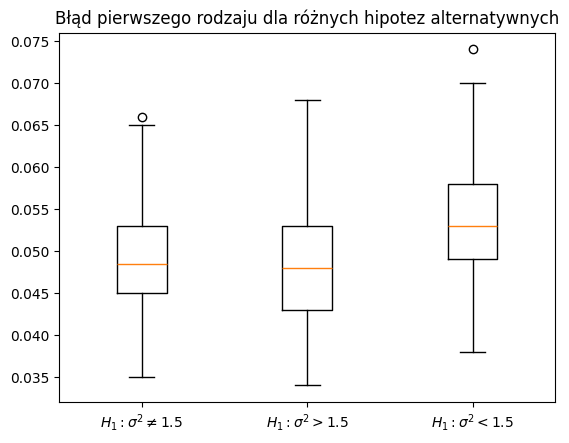

In [79]:
plt.boxplot([results1, results2, results3], labels = (f'$H_1: \\sigma^2 \\neq 1.5$',  f'$H_1: \\sigma^2 > 1.5$', f'$H_1: \\sigma^2 < 1.5$'))
plt.title("Błąd pierwszego rodzaju dla różnych hipotez alternatywnych")
plt.savefig("boxplot_bledy_1_rodzaju_wariancja.png")

### Błędy drugiego rodzaju:

In [ ]:
mu = 0.2

In [ ]:
#hipoteza 1
sigma1 = [1.47, 1.48, 1.49, 1.51, 1.52, 1.53]
results1 = []
for s in sigma1:
    critical_values = 0
    for i in range(N):
        x = np.random.normal(mu, np.sqrt(s), n)
        s2 = np.var(x, ddof=0)
        chi2 = (n-1)*s2/1.5
        if (scipy.stats.chi2.ppf(1 - alpha/2, n-1) < chi2) or (scipy.stats.chi2.ppf(alpha/2, n-1) > chi2):
            critical_values += 1
    error = critical_values/N
    results1.append(error)
    
print(results1)
print(1-np.array(results1))

[0.068, 0.066, 0.045, 0.059, 0.068, 0.076]
[0.932 0.934 0.955 0.941 0.932 0.924]


In [ ]:
#hipoteza 2
sigma2 = [1.51, 1.52, 1.53]
results2 = []
for s in sigma2:
    critical_values = 0
    for i in range(N):
        x = np.random.normal(mu, np.sqrt(s), n)
        s2 = np.var(x, ddof=0)
        chi2 = (n-1)*s2/1.5
        if scipy.stats.chi2.ppf(1 - alpha, n-1) < chi2:
            critical_values += 1
    error = critical_values/N
    results2.append(error)
    
print(results2)
print(1-np.array(results2))

[0.048, 0.063, 0.067]
[0.952 0.937 0.933]


In [ ]:
#hipoteza 3
sigma3 = [1.47, 1.48, 1.49]
results3 = []
for s in sigma3:
    critical_values = 0
    for i in range(N):
        x = np.random.normal(mu, np.sqrt(s), n)
        s2 = np.var(x, ddof=0)
        chi2 = (n-1)*s2/1.5
        if scipy.stats.chi2.ppf(alpha, n-1) > chi2:
            critical_values += 1
    error = critical_values/N
    results3.append(error)
    
print(results3)
print(1-np.array(results3))

[0.071, 0.052, 0.047]
[0.929 0.948 0.953]


Dla zadania 1 korzystamy z analogicznych algorytmów, wykorzystując statystykę Z zamiast statystyki $\chi^2$ oraz obliczając kwantyle rozkładu normalnego za pomocą funkcji scipy.stats.norm.ppf.